In [20]:
!git clone -b src https://github.com/UncleStrawberryBear/music-instrument-classification.git
%cd music-instrument-classification

Cloning into 'music-instrument-classification'...
remote: Enumerating objects: 5521, done.
remote: Total 5521 (delta 0), reused 0 (delta 0), pack-reused 5521 (from 1)
Receiving objects: 100% (5521/5521), 354.41 MiB | 5.84 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Updating files: 100% (5478/5478), done.
/Users/linfengsheng/Desktop/recovery/MusicalInstrumentClassification/music-instrument-classification/music-instrument-classification


In [21]:
import torchaudio
torchaudio.set_audio_backend("ffmpeg")


/var/folders/9j/dbz2hq555652j8pprfb53n3w0000gn/T/ipykernel_78604/3171222317.py:2: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("ffmpeg")


In [30]:
from torch.utils.data import DataLoader
from dataset import AudioInstrumentDataset
from torch.optim import SGD
import torch.nn as nn
import numpy as np
from model import CNNInstrumentClassifier
from constants import *
import os
print(os.path.exists("all-samples/guitar/guitar_E5_very-long_forte_normal.mp3"))

True


In [26]:
!python dataset.py

In [18]:
sequence_length = int(SAMPLE_RATE*0.5)

train_data = AudioInstrumentDataset(r"train_metadata.csv", sequence_length=sequence_length)

loader = DataLoader(train_data, batch_size=32, shuffle=True)

model = CNNInstrumentClassifier()

def train(loader, model, n_epochs=20):
    # Optimization
    opt = SGD(model.parameters(), lr=0.01)
    Loss = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        N = len(loader)
        for i, (x, y) in enumerate(loader):
            opt.zero_grad()
            loss_value = Loss(model(x), y)
            loss_value.backward()
            opt.step()

            losses.append(loss_value.item())
            epochs.append(epoch + i / N)
        print(f'Epoch {epoch}, Loss: {loss_value.item()}')
    return np.array(epochs), np.array(losses)


In [19]:
epoch_data, loss_data = train(loader, model)

Epoch 0, Loss: 1.449187994003296
Epoch 1, Loss: 1.2650307416915894
Epoch 2, Loss: 1.0378583669662476
Epoch 3, Loss: 0.7699368000030518
Epoch 4, Loss: 1.0471490621566772
Epoch 5, Loss: 0.9697391986846924
Epoch 6, Loss: 0.824603796005249
Epoch 7, Loss: 0.8200627565383911
Epoch 8, Loss: 1.385880947113037
Epoch 9, Loss: 0.6810858249664307
Epoch 10, Loss: 0.8181524872779846
Epoch 11, Loss: 0.6716717481613159
Epoch 12, Loss: 0.4537297785282135
Epoch 13, Loss: 0.59175044298172
Epoch 14, Loss: 0.5668394565582275
Epoch 15, Loss: 0.5150940418243408
Epoch 16, Loss: 0.5066289305686951
Epoch 17, Loss: 0.3446823060512543
Epoch 18, Loss: 0.598971962928772
Epoch 19, Loss: 0.5412444472312927


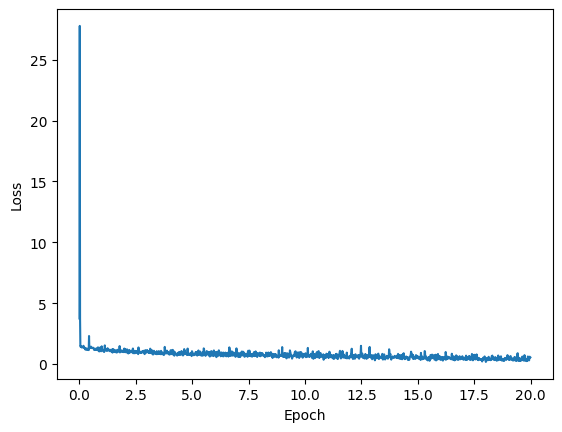

In [20]:
import matplotlib.pyplot as plt
plt.plot(epoch_data, loss_data)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [21]:
test_data = AudioInstrumentDataset(r"test_metadata.csv", sequence_length=sequence_length)
xs, ys = zip(*[test_data[i] for i in range(len(test_data))])

In [22]:
# Convert to tensors (assuming they are NumPy arrays or lists)
xs = torch.stack(xs)  # Convert list of tensors to a single tensor
ys = torch.stack(ys)  # Convert list of one-hot encoded labels to a single tensor

# Run inference
model.eval()
yhats = model(xs).argmax(dim=1)  # Predict class indices
test_accuracy = (yhats == ys.argmax(dim=1)).sum().item() / len(ys)

print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8281718281718282


In [19]:
import torch
x = torch.tensor([2.0], requires_grad=True)
y = x**3 + 2*x**2 -5
y.backward()
print(x.grad)
print(x.ndim)

tensor([20.])
1


In [27]:
!python src_instrument_demo.py


Traceback (most recent call last):
  File "/Users/linfengsheng/Desktop/recovery/MusicalInstrumentClassification/music-instrument-classification/music-instrument-classification/src_instrument_demo.py", line 29, in <module>
    waveform, onehot = train_ds[i]  # waveform: [1, seq_len], onehot: [num_classes]
  File "/Users/linfengsheng/Desktop/recovery/MusicalInstrumentClassification/music-instrument-classification/music-instrument-classification/dataset.py", line 52, in __getitem__
    waveform, sr = torchaudio.load(audio_path)
  File "/Users/linfengsheng/anaconda3/envs/music-clean/lib/python3.10/site-packages/torchaudio/_backend/utils.py", line 204, in load
    backend = dispatcher(uri, format, backend)
  File "/Users/linfengsheng/anaconda3/envs/music-clean/lib/python3.10/site-packages/torchaudio/_backend/utils.py", line 116, in dispatcher
    raise RuntimeError(f"Couldn't find appropriate backend to handle uri {uri} and format {format}.")
RuntimeError: Couldn't find appropriate backend 

In [31]:
!python metadata.py

Metadata saved to train_metadata.csv with 2844 entries.
Metadata saved to test_metadata.csv with 1221 entries.
